In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
#Reading the CSV
housingdf=pd.read_csv("train.csv")

In [4]:
housingdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
(housingdf.isnull().sum()/len(housingdf.index))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [7]:
#Getting the High Null columns dynamically(>=40)
HighNullColumns=[]
for col in housingdf:
    if ((housingdf[col].isnull().sum()/len(housingdf[col].index))*100) >= 40:
        HighNullColumns.append(col)
    

In [8]:
#High Null Columns
HighNullColumns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
housingdf.drop(HighNullColumns,axis=1,inplace=True)

In [10]:
#As we are dropping MiscFeature we can drop MiscVal


housingdf.drop(["MiscVal"],axis=1,inplace=True)

In [11]:
housingdf['MoSold']=housingdf['MoSold'].astype(str)
housingdf['YrSold']=housingdf['YrSold'].astype(str)

In [12]:
housingdf.shape

(1460, 75)

In [13]:
len(housingdf.index)

1460

# EDA

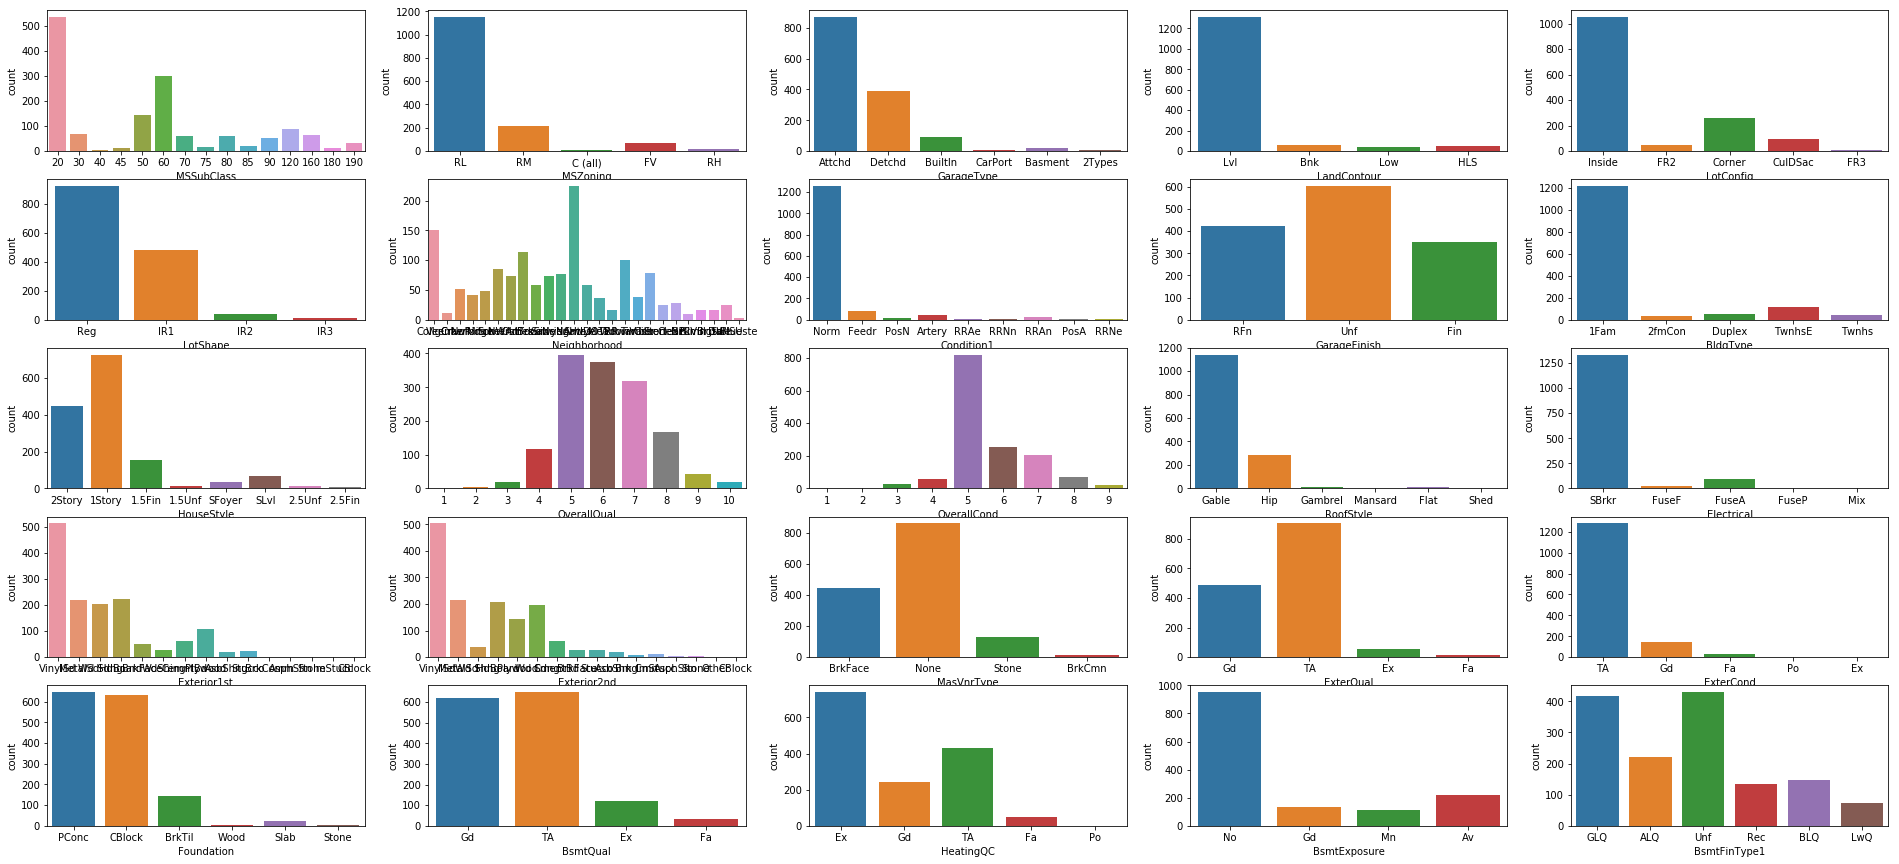

In [14]:
#Drawing the countplot and Identifing the Variables with no variance
plt.figure(figsize=(33, 15))
plt.subplot(5,5,1)
sns.countplot(x="MSSubClass",data=housingdf)
plt.subplot(5,5,2)
sns.countplot(x="MSZoning",data=housingdf)
plt.subplot(5,5,3)
sns.countplot(x="GarageType",data=housingdf)
plt.subplot(5,5,4)
sns.countplot(x="LandContour",data=housingdf)
plt.subplot(5,5,5)
sns.countplot(x="LotConfig",data=housingdf)
plt.subplot(5,5,6)
sns.countplot(x="LotShape",data=housingdf)
#Neighborhood
plt.subplot(5,5,7)
sns.countplot(x="Neighborhood",data=housingdf)
plt.subplot(5,5,8)
sns.countplot(x="Condition1",data=housingdf)
plt.subplot(5,5,9)
sns.countplot(x="GarageFinish",data=housingdf)
plt.subplot(5,5,10)
sns.countplot(x="BldgType",data=housingdf)
plt.subplot(5,5,11)
sns.countplot(x="HouseStyle",data=housingdf)
plt.subplot(5,5,12)
sns.countplot(x="OverallQual",data=housingdf)

plt.subplot(5,5,13)
sns.countplot(x="OverallCond",data=housingdf)
plt.subplot(5,5,14)
sns.countplot(x="RoofStyle",data=housingdf)

plt.subplot(5,5,15)
sns.countplot(x="Electrical",data=housingdf)
plt.subplot(5,5,16)
sns.countplot(x="Exterior1st",data=housingdf)

plt.subplot(5,5,17)
sns.countplot(x="Exterior2nd",data=housingdf)
plt.subplot(5,5,18)
sns.countplot(x="MasVnrType",data=housingdf)

plt.subplot(5,5,19)
sns.countplot(x="ExterQual",data=housingdf)
plt.subplot(5,5,20)
sns.countplot(x="ExterCond",data=housingdf)
plt.subplot(5,5,21)
sns.countplot(x="Foundation",data=housingdf)
plt.subplot(5,5,22)
sns.countplot(x="BsmtQual",data=housingdf)
plt.subplot(5,5,23)
sns.countplot(x="HeatingQC",data=housingdf)
plt.subplot(5,5,24)
sns.countplot(x="BsmtExposure",data=housingdf)
plt.subplot(5,5,25)
sns.countplot(x="BsmtFinType1",data=housingdf)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stac

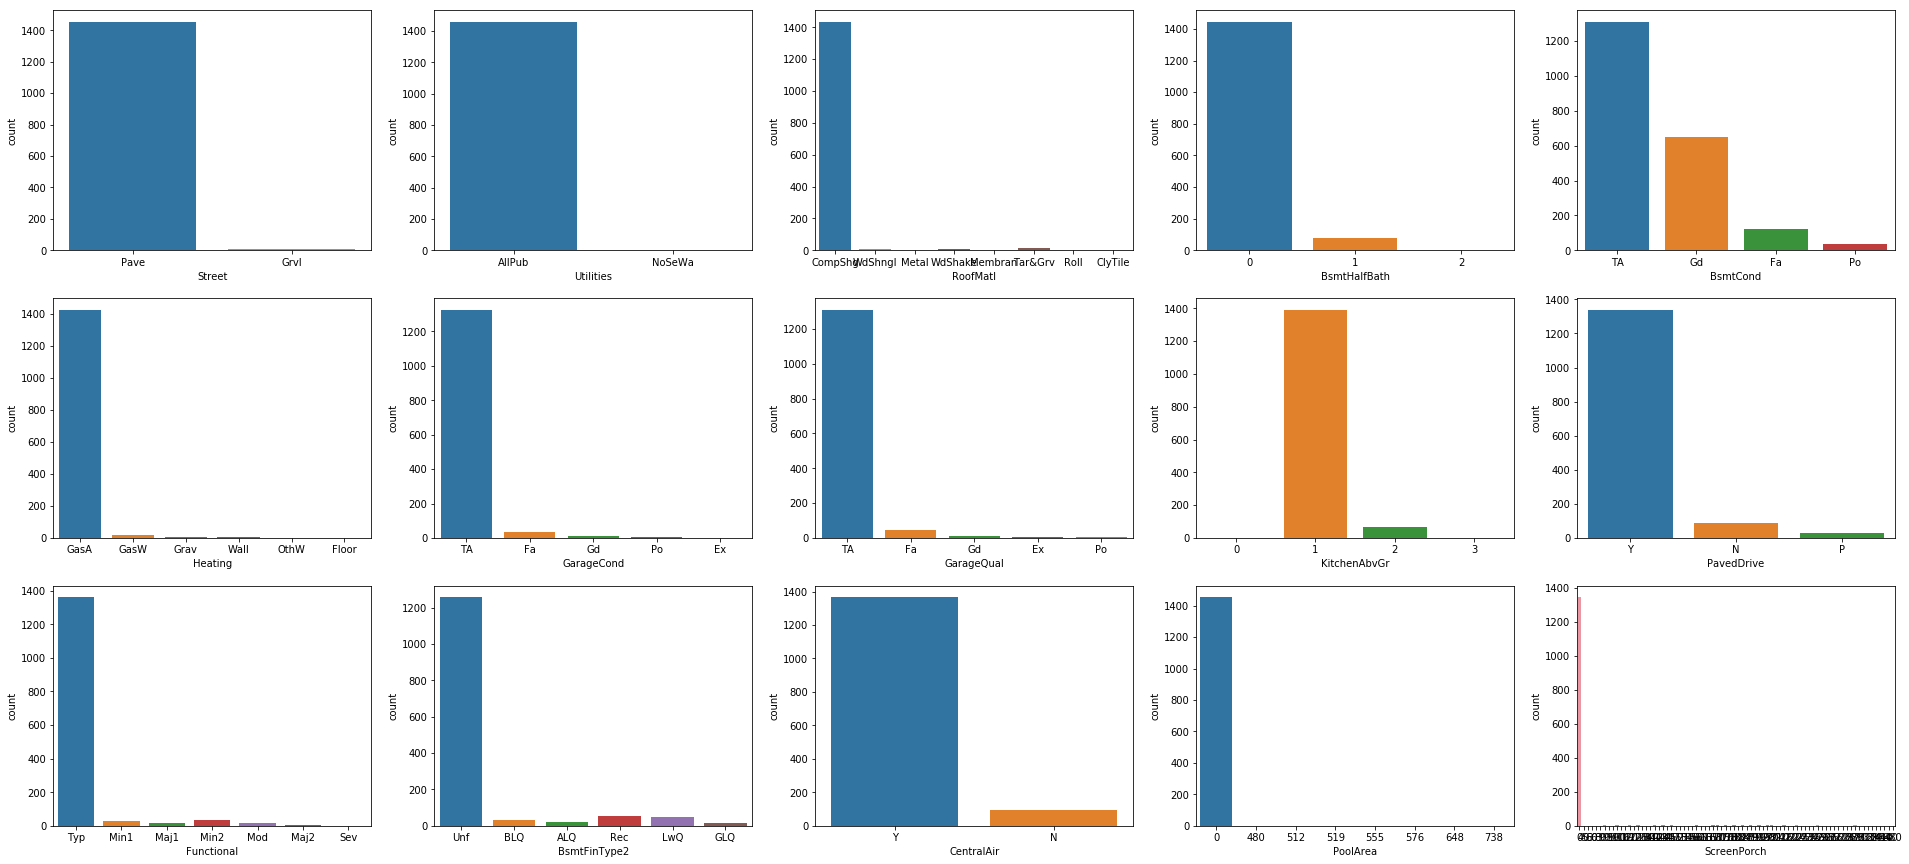

In [15]:
#Ploting the Now Variance features
plt.figure(figsize=(33, 15))
plt.subplot(3,5,1)
sns.countplot(x="Street",data=housingdf)
plt.subplot(3,5,2)
sns.countplot(x="Utilities",data=housingdf)
plt.subplot(3,5,3)
sns.countplot(x="RoofMatl",data=housingdf)
plt.subplot(3,5,4)
sns.countplot(x="Condition2",data=housingdf)
plt.subplot(3,5,5)
sns.countplot(x="BsmtQual",data=housingdf)
plt.subplot(3,5,4)
sns.countplot(x="BsmtHalfBath",data=housingdf)
plt.subplot(3,5,5)
sns.countplot(x="BsmtCond",data=housingdf)
plt.subplot(3,5,6)
sns.countplot(x="Heating",data=housingdf)
plt.subplot(3,5,7)
sns.countplot(x="GarageCond",data=housingdf)
plt.subplot(3,5,8)
sns.countplot(x="GarageQual",data=housingdf)
plt.subplot(3,5,9)
sns.countplot(x="KitchenAbvGr",data=housingdf)
plt.subplot(3,5,10)
sns.countplot(x="PavedDrive",data=housingdf)
plt.subplot(3,5,11)
sns.countplot(x="Functional",data=housingdf)
plt.subplot(3,5,12)
sns.countplot(x="BsmtFinType2",data=housingdf)
plt.subplot(3,5,13)
sns.countplot(x="CentralAir",data=housingdf)
plt.subplot(3,5,14)
sns.countplot(x="PoolArea",data=housingdf)
plt.subplot(3,5,15)
sns.countplot(x="ScreenPorch",data=housingdf)

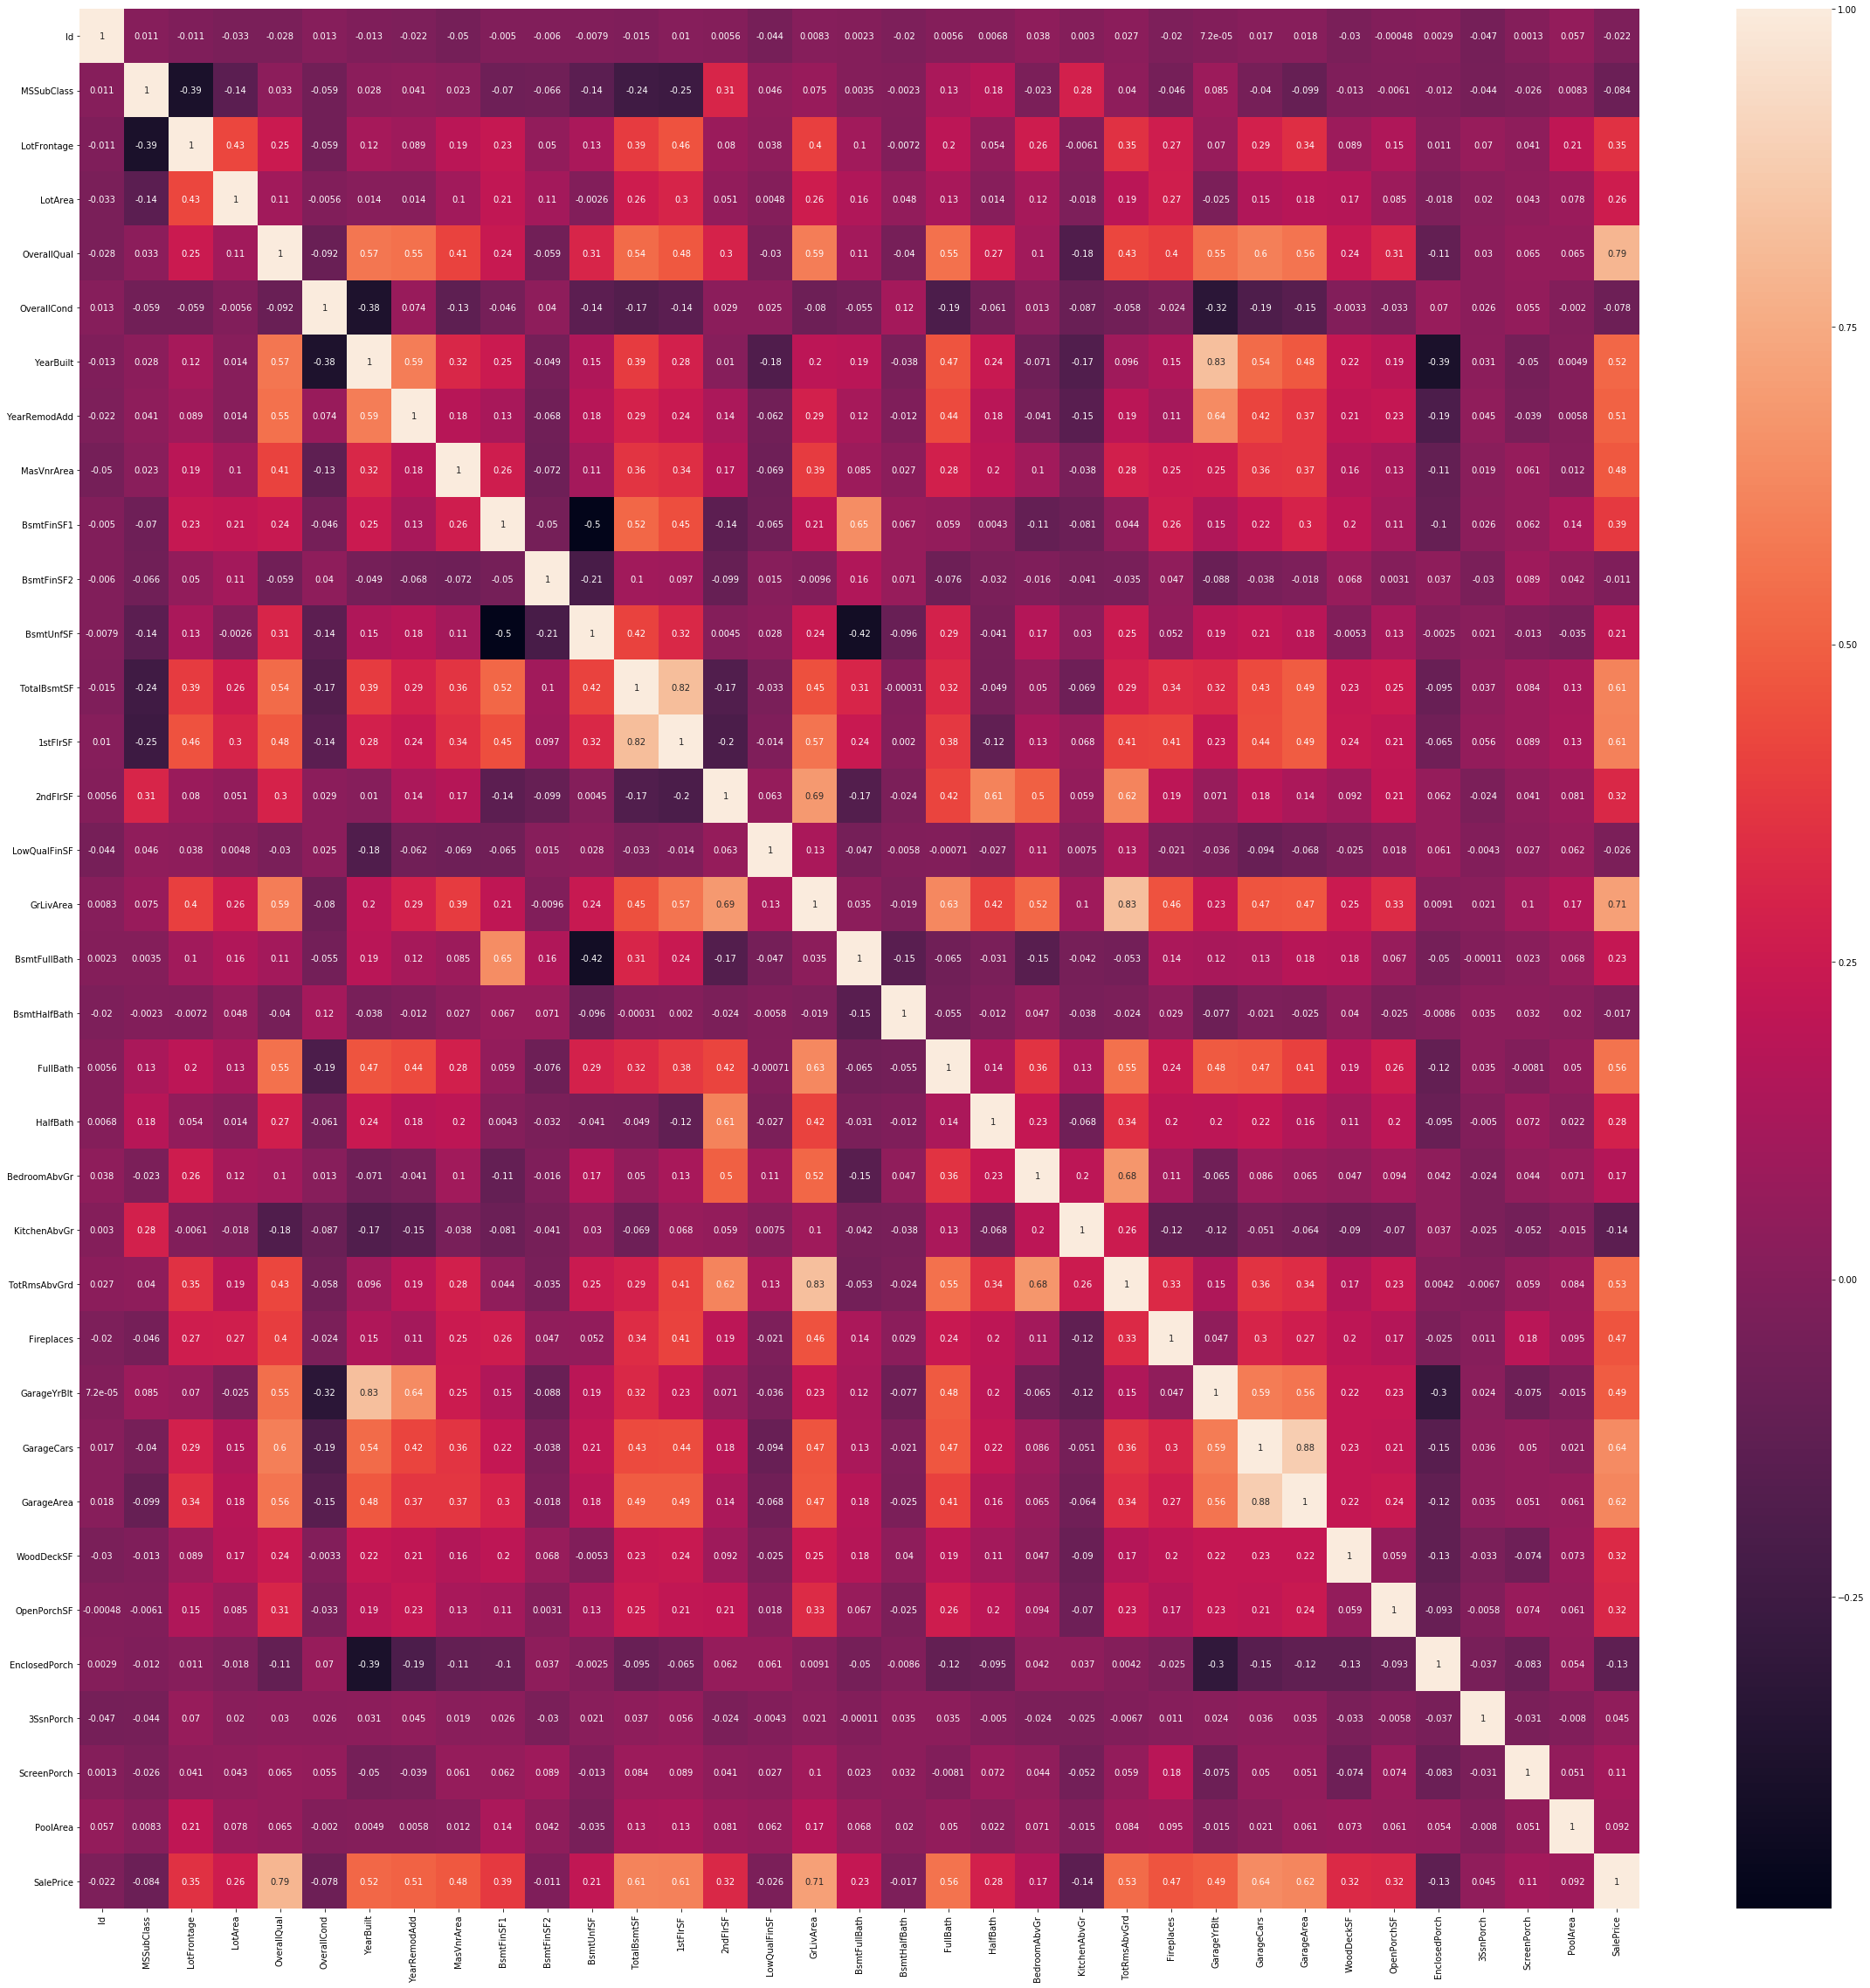

In [16]:
#Finding the corelations
plt.figure(figsize=(40,40))
sns.heatmap(housingdf.corr(),annot=True)

In [17]:
# droping the highly corellated and no variance features
housingdf.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'MasVnrType', 'Heating', 'LowQualFinSF', 'BsmtFullBath',
          'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
          'BsmtUnfSF', 'BsmtFinType2', 'Functional', 'WoodDeckSF', 'OpenPorchSF',
          'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageArea',
          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','Id'],axis=1,inplace=True)

In [18]:
#Filling the null values with mean and mideans 
housingdf['Electrical'] = housingdf['Electrical'].fillna(housingdf['Electrical'].mode()[0])
housingdf['LotFrontage'] = housingdf['LotFrontage'].fillna(housingdf['LotFrontage'].mean())

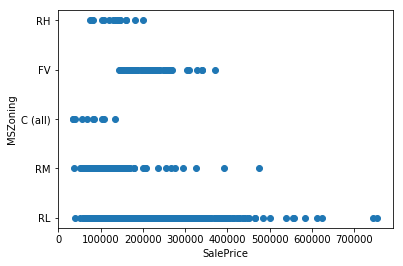

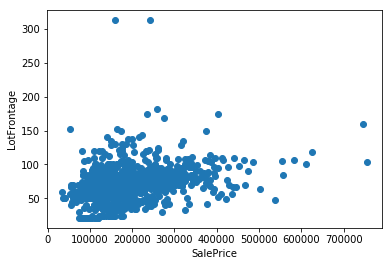

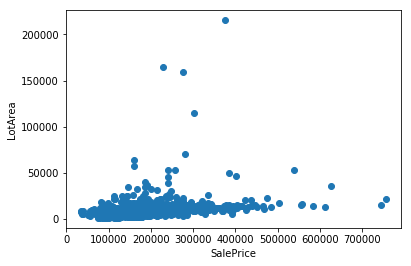

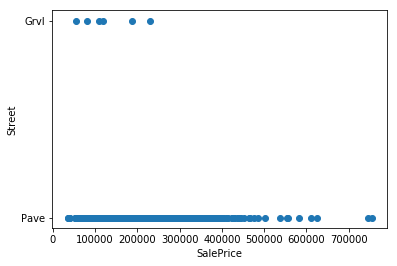

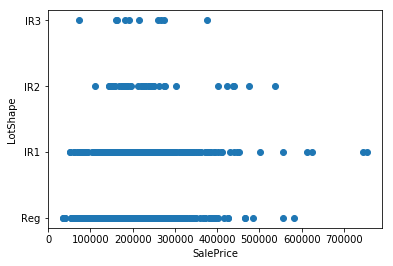

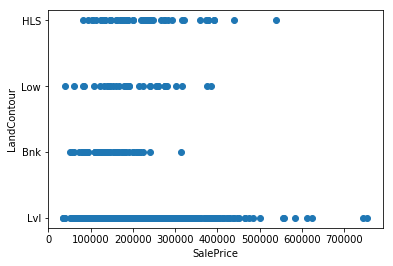

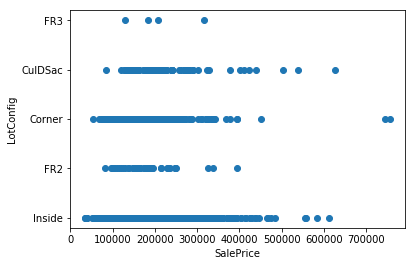

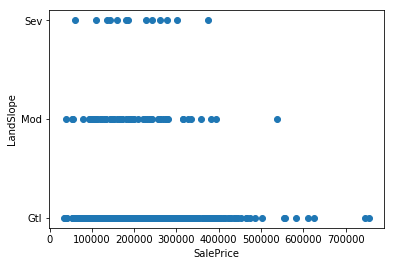

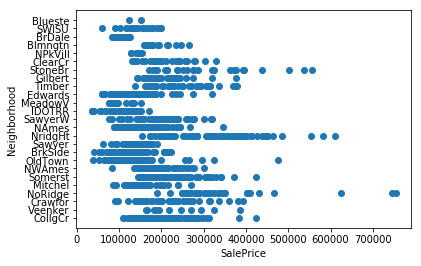

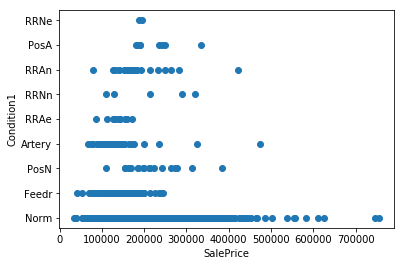

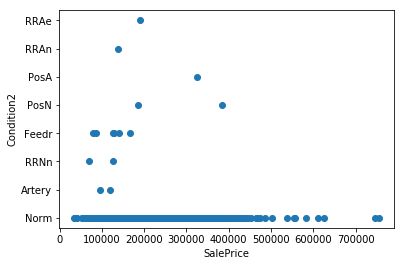

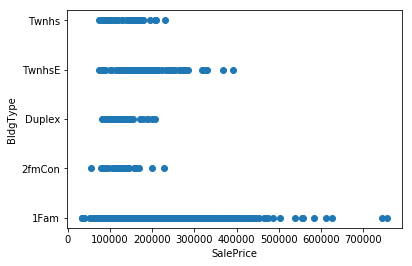

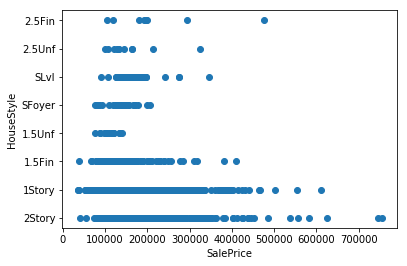

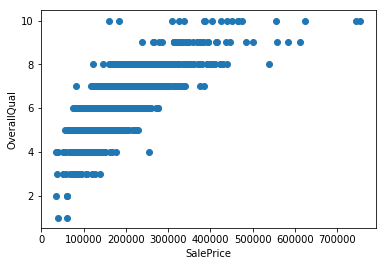

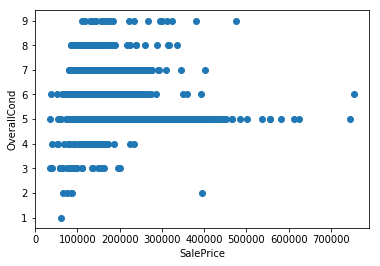

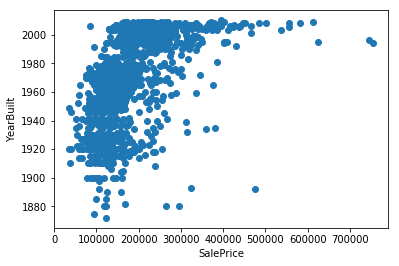

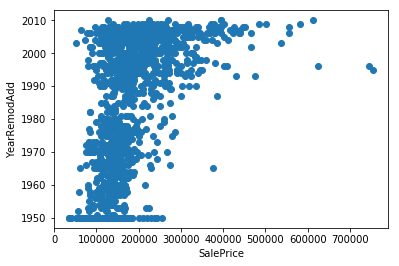

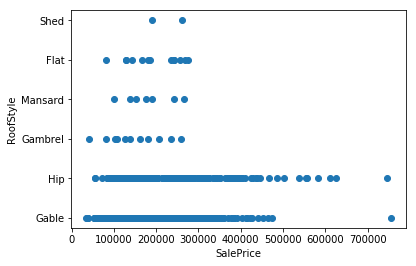

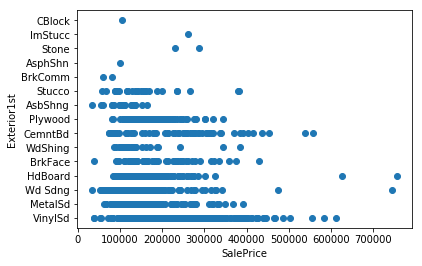

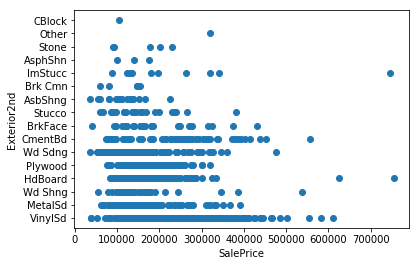

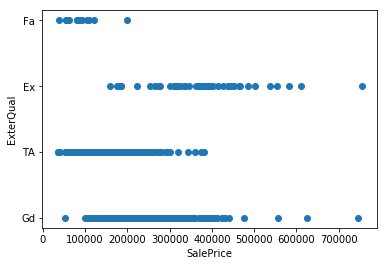

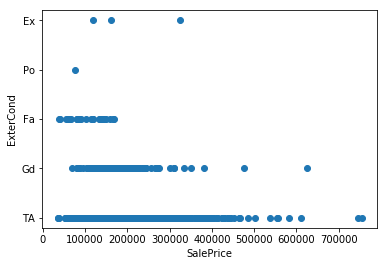

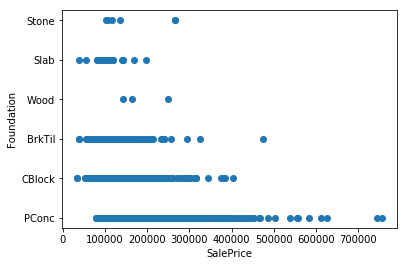

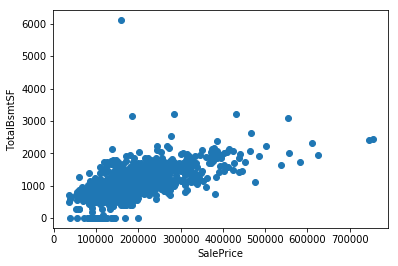

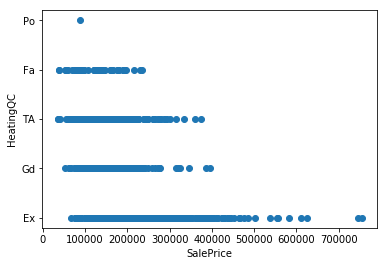

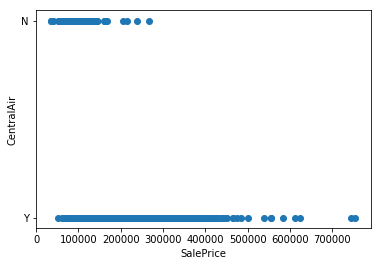

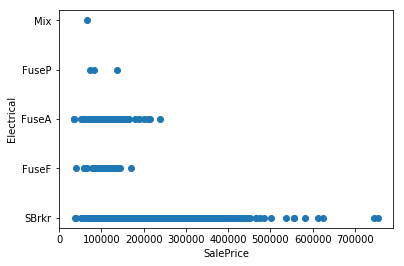

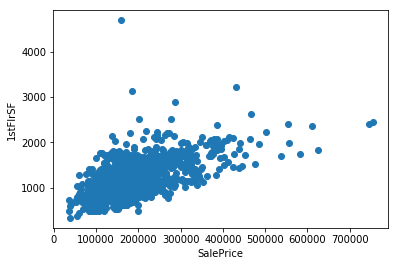

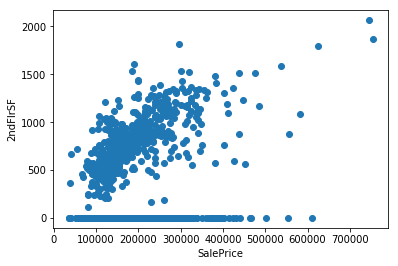

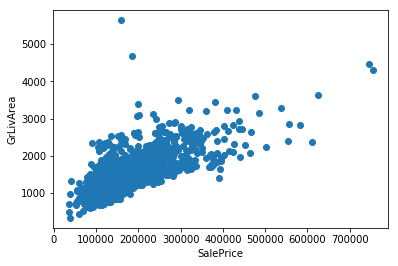

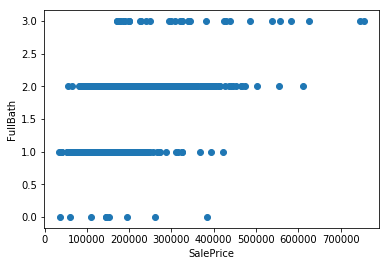

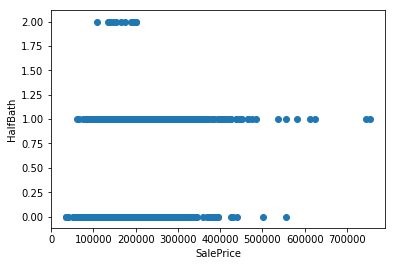

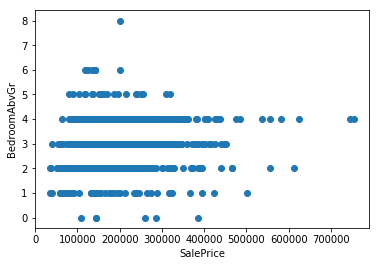

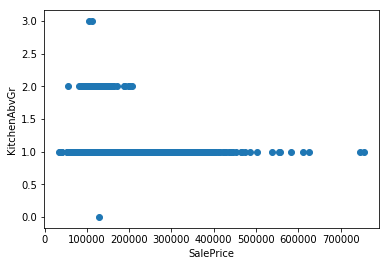

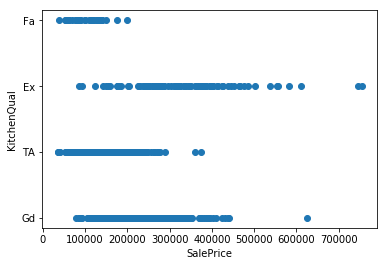

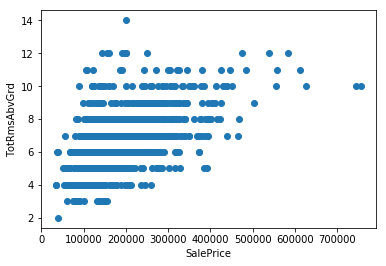

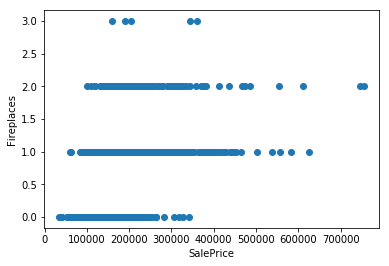

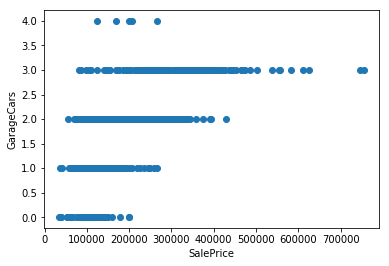

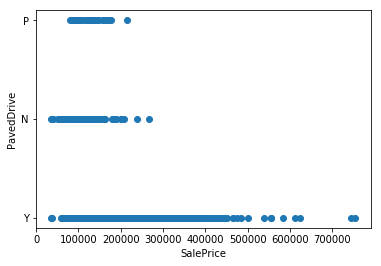

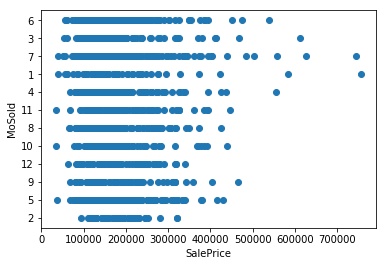

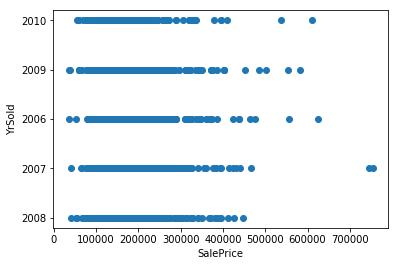

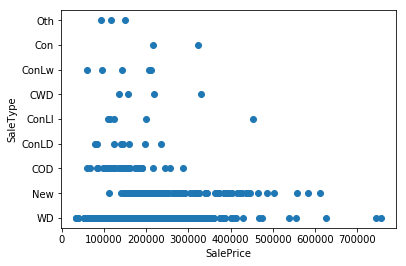

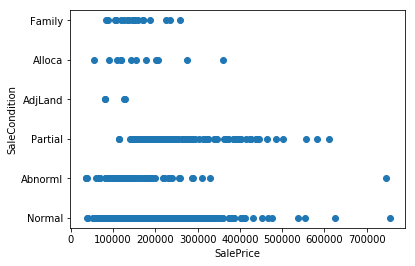

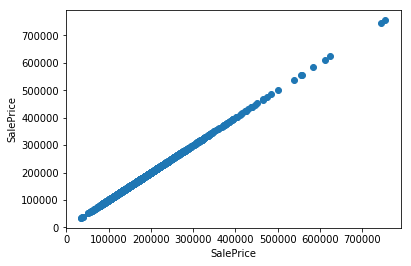

In [19]:
plt.figure()
for col in range(1, housingdf.shape[1]):
    plt.scatter(housingdf["SalePrice"], housingdf.iloc[:, col])
    plt.ylabel(housingdf.columns[col])
    plt.xlabel("SalePrice")
    plt.show()

# Data Preparation

In [20]:
#As we have seen there is high corellation among '1stFlrSF','2ndFlrSF','TotalBsmtSF'
housingdf["TotalArea"]=housingdf["1stFlrSF"]+housingdf["2ndFlrSF"]+housingdf["TotalBsmtSF"]

In [21]:
#Dropping as ve have derived variable
housingdf.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1,inplace=True)

In [22]:
#OutLier Treatment
#Removing Outliers
Q1 = housingdf["LotFrontage"].quantile(0.25)
Q3 = housingdf["LotFrontage"].quantile(0.75)
IQR = Q3 - Q1
housingdf = housingdf[(housingdf["LotFrontage"] >= Q1 - 1.5*IQR) & (housingdf["LotFrontage"] <= Q3 + 1.5*IQR)]



Q1 = housingdf["LotArea"].quantile(0.25)
Q3 = housingdf["LotArea"].quantile(0.75)
IQR = Q3 - Q1
housingdf = housingdf[(housingdf["LotArea"] >= Q1 - 1.5*IQR) & (housingdf["LotArea"] <= Q3 + 1.5*IQR)]


Q1 = housingdf["TotalArea"].quantile(0.25)
Q3 = housingdf["TotalArea"].quantile(0.75)
IQR = Q3 - Q1
housingdf = housingdf[(housingdf["TotalArea"] >= Q1 - 1.5*IQR) & (housingdf["TotalArea"] <= Q3 + 1.5*IQR)]

Q1 = housingdf["GrLivArea"].quantile(0.25)
Q3 = housingdf["GrLivArea"].quantile(0.75)
IQR = Q3 - Q1
housingdf = housingdf[(housingdf["GrLivArea"] >= Q1 - 1.5*IQR) & (housingdf["GrLivArea"] <= Q3 + 1.5*IQR)]

Q1 = housingdf["OverallCond"].quantile(0.25)
Q3 = housingdf["OverallCond"].quantile(0.75)
IQR = Q3 - Q1
housingdf = housingdf[(housingdf["OverallCond"] >= Q1 - 1.5*IQR) & (housingdf["OverallCond"] <= Q3 + 1.5*IQR)]

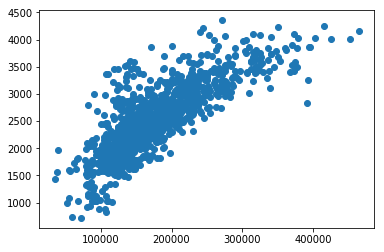

In [23]:
#there is a nice treand observed
plt.scatter(housingdf["SalePrice"], housingdf["TotalArea"])

# Creating Dummys

In [24]:
#dynamically getting the object types for creating dummies
df=housingdf.loc[:,housingdf.dtypes=='object']
cols=df.columns

In [25]:
#Dynamically getting the non object type. This will used for scaling purpse
df1=housingdf.loc[:,housingdf.dtypes!='object']
cols1=list(df1.columns)
cols1.remove('MSSubClass')
cols1.remove('OverallCond')
cols1.remove('OverallQual')
print(cols1)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'SalePrice', 'TotalArea']


In [26]:
cols=list(cols)+['OverallCond','MSSubClass']#'OverallQual',
cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'MSSubClass']

In [27]:
#dynamically creating the dummies for each object type
for col in cols:
    dummies=pd.get_dummies(housingdf[col],prefix=col,drop_first=True)
    housingdf=pd.concat([housingdf,dummies],axis=1)

In [28]:
housingdf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,1,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,1,0,0,0,0,0,0,0,0,0
5,50,RL,85.0,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#dropping the created dummies
housingdf.drop(list(cols),axis=1,inplace=True)

In [30]:
housingdf.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,7,2003,2003,1710,2,1,3,1,...,1,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,2001,2002,1786,2,1,3,1,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,7,1915,1970,1717,1,0,3,1,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,8,2000,2000,2198,2,1,4,1,...,1,0,0,0,0,0,0,0,0,0
5,85.0,14115,5,1993,1995,1362,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
list(housingdf.columns)

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'SalePrice',
 'TotalArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 '

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scalar=StandardScaler()

In [35]:
#splitting the data to test train
df_train,df_test=train_test_split(housingdf,train_size=0.7,test_size=0.3,random_state=100)

In [36]:
cols1

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'SalePrice',
 'TotalArea']

In [37]:
ScaleCols=['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'TotalArea',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']


In [38]:
#performing the scaling on numeric columns
df_train[ScaleCols]=scalar.fit_transform(df_train[ScaleCols])

In [39]:
X_train=df_train.drop(["SalePrice"],axis=1)
y_train=df_train["SalePrice"]

In [40]:
X_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
206,-2.054238,1.599091,5,-0.362717,-1.051981,0.530281,-1.102740,1.236879,0.135442,-0.23618,...,0,0,0,0,0,0,0,0,0,0
121,-1.347406,-1.204476,4,-1.126675,-1.624976,-0.839835,-1.102740,-0.752559,0.135442,-0.23618,...,0,0,0,0,0,0,0,0,0,0
900,0.069790,-0.733103,4,-0.063777,-0.622235,-1.473483,-1.102740,-0.752559,-1.187591,-0.23618,...,0,0,0,0,0,0,0,0,0,0
416,0.348991,-0.547500,6,0.168732,-0.287988,-0.177493,-1.102740,1.236879,0.135442,-0.23618,...,1,0,0,0,0,0,0,0,0,0
238,1.691972,0.994039,8,1.131983,1.096750,0.525499,0.838567,-0.752559,0.135442,-0.23618,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 126),
 ('LotArea', False, 39),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 97),
 ('GrLivArea', False, 2),
 ('FullBath', False, 142),
 ('HalfBath', False, 119),
 ('BedroomAbvGr', False, 60),
 ('KitchenAbvGr', False, 52),
 ('TotRmsAbvGrd', False, 131),
 ('Fireplaces', False, 88),
 ('GarageCars', False, 43),
 ('TotalArea', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 26),
 ('LotShape_IR2', False, 141),
 ('LotShape_IR3', False, 93),
 ('LotShape_Reg', False, 137),
 ('LandContour_HLS', False, 34),
 ('LandContour_Low', False, 75),
 ('LandContour_Lvl', False, 67),
 ('LotConfig_CulDSac', False, 123),
 ('LotConfig_FR2', False, 136),
 ('LotConfig_FR3', False, 27),
 ('LotConfig_Inside', False, 74),
 ('LandSlope_Mod', False, 73),
 ('LandSlope_Sev', False, 62),
 ('Neighborhood_BrkSide', False, 42),
 ('Neighborhood_ClearCr', False, 46),
 ('Neighborh

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'YearBuilt', 'TotalArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'Condition1_RRNn',
       'BldgType_Duplex', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'HeatingQC_Po',
       'Electrical_FuseP', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'OverallCond_7', 'MSSubClass_90', 'MSSubClass_160'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces',
       ...
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_120',
       'MSSubClass_180', 'MSSubClass_190'],
      dtype='object', length=145)

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.16e-319
Time:                        23:15:23   Log-Likelihood:                -9159.9
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     771   BIC:                         1.852e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.171e+05 

In [50]:
X_train_new = X_train_rfe.drop(["HeatingQC_Po"], axis = 1)

In [51]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     186.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          8.97e-321
Time:                        23:16:25   Log-Likelihood:                -9160.0
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     772   BIC:                         1.851e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.171e+05 

In [52]:
X_train_new = X_train_new.drop(['Exterior2nd_Other'], axis=1)

In [53]:
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     192.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          9.68e-322
Time:                        23:17:01   Log-Likelihood:                -9160.4
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     773   BIC:                         1.851e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.17e+05 

In [54]:
X_train_new = X_train_new.drop(['Neighborhood_MeadowV'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     200.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.04e-322
Time:                        23:17:40   Log-Likelihood:                -9160.9
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     774   BIC:                         1.850e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.177e+05 

In [55]:
X_train_new = X_train_new.drop(['Electrical_FuseP'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     208.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.48e-323
Time:                        23:18:13   Log-Likelihood:                -9161.7
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     775   BIC:                         1.850e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.177e+05 

In [56]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     216.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:18:53   Log-Likelihood:                -9162.6
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     776   BIC:                         1.849e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.176e+05 

In [57]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Fin'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     225.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:19:51   Log-Likelihood:                -9163.5
No. Observations:                 801   AIC:                         1.837e+04
Df Residuals:                     777   BIC:                         1.849e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.181e+05 

In [58]:
X_train_new = X_train_new.drop(['Condition1_RRAe'], axis=1)
## Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     235.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:20:41   Log-Likelihood:                -9164.8
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     778   BIC:                         1.848e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.178e+05 

In [59]:
X_train_new = X_train_new.drop(['RoofStyle_Mansard'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm8 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     245.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:21:41   Log-Likelihood:                -9166.3
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     779   BIC:                         1.848e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.175e+05 

In [60]:
X_train_new = X_train_new.drop(['MSZoning_RH'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm9 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     257.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:22:07   Log-Likelihood:                -9167.8
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     780   BIC:                         1.848e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.302e+05 

In [61]:
X_train_new = X_train_new.drop(['MSZoning_RM'], axis=1)
## Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm10 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     271.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:22:49   Log-Likelihood:                -9168.0
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     781   BIC:                         1.847e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.331e+05 

In [62]:
X_train_new = X_train_new.drop(['Condition1_RRNn'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm11 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:23:55   Log-Likelihood:                -9170.0
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     782   BIC:                         1.847e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.327e+05 

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,BldgType_Duplex,inf
18,MSSubClass_90,inf
0,const,198.360000
14,ExterQual_TA,20.330000
13,ExterQual_Gd,16.390000
1,OverallQual,3.390000
2,YearBuilt,3.010000
3,TotalArea,2.130000
5,MSZoning_RL,1.690000
4,MSZoning_FV,1.680000


In [64]:
X_train_new = X_train_new.drop(['BldgType_Duplex'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm12 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:24:52   Log-Likelihood:                -9170.0
No. Observations:                 801   AIC:                         1.838e+04
Df Residuals:                     782   BIC:                         1.847e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.327e+05 

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,198.36
13,ExterQual_TA,20.33
12,ExterQual_Gd,16.39
1,OverallQual,3.39
2,YearBuilt,3.01
3,TotalArea,2.13
5,MSZoning_RL,1.69
4,MSZoning_FV,1.68
8,Neighborhood_NridgHt,1.46
17,MSSubClass_90,1.33


In [66]:

X_train_new = X_train_new.drop(['ExterQual_TA'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm13 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     283.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          2.90e-320
Time:                        23:25:22   Log-Likelihood:                -9192.3
No. Observations:                 801   AIC:                         1.842e+04
Df Residuals:                     783   BIC:                         1.850e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.432e+04 

In [67]:

X_train_new = X_train_new.drop(['ExterQual_Gd'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm14 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     301.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.74e-321
Time:                        23:25:55   Log-Likelihood:                -9192.4
No. Observations:                 801   AIC:                         1.842e+04
Df Residuals:                     784   BIC:                         1.850e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.451e+04 

In [68]:


X_train_new = X_train_new.drop(['ExterQual_Fa'], axis=1)
## Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm15 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     321.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.58e-322
Time:                        23:27:02   Log-Likelihood:                -9192.9
No. Observations:                 801   AIC:                         1.842e+04
Df Residuals:                     785   BIC:                         1.849e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.459e+04 

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.98
1,OverallQual,3.05
2,YearBuilt,2.55
3,TotalArea,2.09
4,MSZoning_FV,1.67
5,MSZoning_RL,1.67
14,MSSubClass_90,1.33
8,Neighborhood_NridgHt,1.22
11,SaleCondition_Alloca,1.22
13,OverallCond_7,1.16


In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.98
1,OverallQual,3.05
2,YearBuilt,2.55
3,TotalArea,2.09
4,MSZoning_FV,1.67
5,MSZoning_RL,1.67
14,MSSubClass_90,1.33
8,Neighborhood_NridgHt,1.22
11,SaleCondition_Alloca,1.22
13,OverallCond_7,1.16


In [71]:
list(vif.Features)

['const',
 'OverallQual',
 'YearBuilt',
 'TotalArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSSubClass_90',
 'Neighborhood_NridgHt',
 'SaleCondition_Alloca',
 'OverallCond_7',
 'Neighborhood_Crawfor',
 'MSSubClass_160',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'Exterior2nd_Stucco',
 'SaleCondition_Family']

In [72]:
df_test[ScaleCols]=scalar.transform(df_test[ScaleCols])

In [73]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [74]:
X_test_m=X_test[['OverallQual',
 'YearBuilt',
 'TotalArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSSubClass_90',
 'Neighborhood_NridgHt',
 'SaleCondition_Alloca',
 'OverallCond_7',
 'Neighborhood_Crawfor',
 'MSSubClass_160',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'Exterior2nd_Stucco',
 'SaleCondition_Family']]

In [75]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test_m)

In [77]:
# Making predictions using the model

y_pred_m = lm15.predict(X_test_m)

In [78]:
y_train_predict=lm15.predict(X_train_lm)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

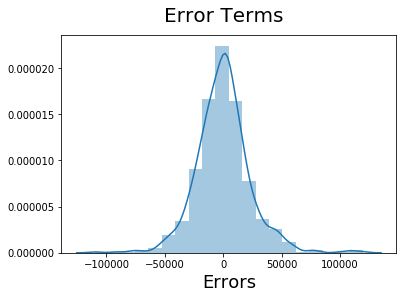

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0,0.5,'y_pred')

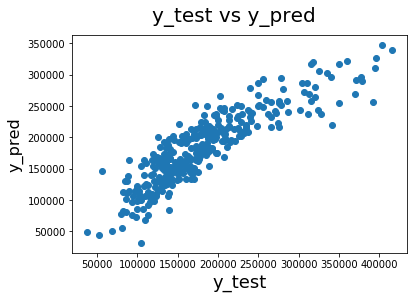

In [80]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [81]:
from sklearn.metrics import r2_score

In [82]:
r2_score(y_test, y_pred_m)

0.7770001436854548

In [83]:
r2_score(y_train,y_train_predict)

0.8598729135501058

# Cross Validation

In [84]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [85]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021415,0.003325,0.002802,4.000923e-04,0.0001,{'alpha': 0.0001},-17024.561259,-18526.871099,-15357.700480,-19164.154809,...,-17204.281493,1455.650202,26,-12026.153442,-11628.978438,-12568.626856,-11988.420521,-12477.253147,-12137.886481,344.824229
1,0.018013,0.002368,0.002201,4.003544e-04,0.001,{'alpha': 0.001},-17019.491817,-18523.562518,-15351.982096,-19159.314558,...,-17200.050006,1455.704920,25,-12026.880157,-11629.541128,-12568.918259,-11989.338543,-12477.887122,-12138.513042,344.729099
2,0.016811,0.001470,0.002401,4.911481e-04,0.01,{'alpha': 0.01},-16969.967013,-18492.175093,-15297.781995,-19110.362610,...,-17158.418514,1456.004540,24,-12034.060687,-11634.631838,-12572.162881,-11998.507649,-12483.741536,-12144.620918,343.935005
3,0.018414,0.001358,0.002001,5.091228e-07,0.05,{'alpha': 0.05},-16816.822746,-18386.210052,-15106.171614,-18903.122685,...,-17003.617729,1454.231018,23,-12063.373163,-11655.048750,-12588.386520,-12033.253602,-12511.341280,-12170.280663,342.579744
4,0.017412,0.001021,0.002202,4.004719e-04,0.1,{'alpha': 0.1},-16673.410306,-18313.085225,-14938.414630,-18687.678926,...,-16857.889200,1453.496803,22,-12094.435831,-11676.288801,-12610.106367,-12067.206150,-12545.772800,-12198.761990,343.741129


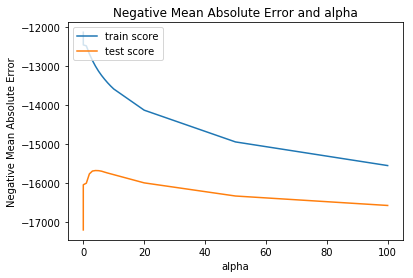

In [86]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Ridge Regression

In [87]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([  1679.10556889,   5777.47062603,  11512.90429062,  11355.26223529,
         3618.59471456,  11802.80141611,  -1350.5863168 ,    234.48788044,
        -3763.35028351,  -4768.32760372,    132.27234355,   1632.87559478,
         5845.83979986,  14542.5836558 ,   7891.21527799,   2019.35659597,
         1935.2981177 ,  -2142.41137379,      0.        ,    214.65711   ,
         -925.79418201,   1489.53518433,   3722.23358779,  -1221.84003094,
        -3725.85941728,   3577.61268078,  -1083.13113697,      0.        ,
         -385.41259048,   2239.01832313,  -4467.09048564,   9145.17229543,
          123.94834216,  -5804.421497  ,   7120.15482341,  -6625.57313016,
       -11079.72592673,  -4067.61053864,    -36.82193011,  -3270.53205587,
        -2916.9419221 ,   -492.54890317, -11335.29357535,  15256.40172497,
        21558.42226894,  -7169.67374603,  -2659.42427522,  -2205.29107776,
        -3949.78692036,   1468.83253867,  19023.81152772,  -2579.92456649,
        -1439.18400754,  

In [88]:
from sklearn.metrics import r2_score
y_train_pred=ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9060543793567095
0.8974572460266885


In [89]:
print(X_test.shape)
y_test.shape

(344, 175)


(344,)

In [90]:
ridge_train_score = ridge.score(X_train, y_train)
ridge_train_score


0.9060543793567095

In [91]:
ridge.fit(X_test, y_test)
ridge_test_score = ridge.score(X_test, y_test)
ridge_test_score

0.9351162180450904

# Lasso Regression

In [92]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visu

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visu

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Microsoft Visu

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [93]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.424759,0.047006,0.002201,0.000748,0.0001,{'alpha': 0.0001},-17098.989106,-18524.673001,-15371.871915,-19385.362742,...,-17280.393490,1498.245967,27,-12026.074304,-11630.642572,-12568.595049,-11989.744798,-12479.143055,-12138.839956,344.588357
1,0.322534,0.066124,0.001200,0.000401,0.001,{'alpha': 0.001},-17098.648262,-18524.561691,-15371.727071,-19371.053191,...,-17275.988599,1495.463071,26,-12026.094674,-11630.644709,-12568.598758,-11989.751987,-12479.145916,-12138.847209,344.587262
2,0.238967,0.021146,0.001404,0.000488,0.01,{'alpha': 0.01},-17095.823615,-18523.448587,-15370.278631,-19314.050122,...,-17261.776693,1481.322207,25,-12026.272558,-11630.687325,-12568.635888,-11989.937654,-12479.220332,-12138.950751,344.570949
3,0.186136,0.031973,0.001000,0.000002,0.05,{'alpha': 0.05},-17084.045901,-18518.480924,-15360.963102,-19287.185860,...,-17249.823175,1476.856195,24,-12027.062051,-11630.971915,-12568.667711,-11990.785902,-12479.642122,-12139.425940,344.453349
4,0.173723,0.007945,0.001201,0.000749,0.1,{'alpha': 0.1},-17074.261716,-18511.924898,-15349.027294,-19267.249097,...,-17238.077575,1475.293748,23,-12027.987955,-11631.490101,-12568.740776,-11991.724246,-12480.213760,-12140.031367,344.290216


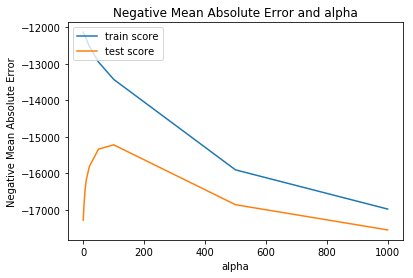

In [94]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [95]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
#r2 score on test and train
from sklearn.metrics import r2_score
y_train_pred=lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9059362227179588
0.8954708123201167


In [97]:
lasso.coef_

array([  1647.15080549,   5636.18037111,  10638.16608661,  12568.00200061,
         3070.35770683,  11176.82402718,   -907.74710206,    298.49741116,
        -3435.47243318,  -4941.74845066,      0.        ,   1882.47793022,
         5937.96884021,  14478.9576797 ,  12295.15600244,      0.        ,
         1255.77960539,  -1594.35780016,      0.        ,      0.        ,
           -0.        ,   1113.72416343,   2535.46714837,     -0.        ,
        -3890.63631018,   2544.35172266,     -0.        ,      0.        ,
           -0.        ,      0.        ,     -0.        ,  12148.4937505 ,
            0.        ,   -435.47510393,  10066.32023337,  -2828.43524092,
        -6771.6098527 ,     -0.        ,      0.        ,     -0.        ,
            0.        ,     -0.        ,  -9452.65291143,  25478.24798765,
        31543.9156906 ,  -4094.64259314,     -0.        ,     -0.        ,
           -0.        ,   3615.06692117,  36305.42073246,      0.        ,
           -0.        ,  

In [98]:
lasso_train_score = lasso.score(X_train, y_train)
lasso_train_score

0.9059362227179588

In [99]:
lasso.fit(X_test, y_test)
lasso_test_score = lasso.score(X_test, y_test)
lasso_test_score

0.945247814375666